In this notebook I attempt to replicate a logo postmark I received on some junk mail.

![postmark](checkerBall postmark.jpg) 

By observation the image consists of alternative regions of color defined by two checkboard patterns, one rotated by 45 degrees, which are combined with exclusive-or.  This image is then mapped onto the surface of a ball.

In [5]:
%matplotlib inline  
%run FunctionalImages.py

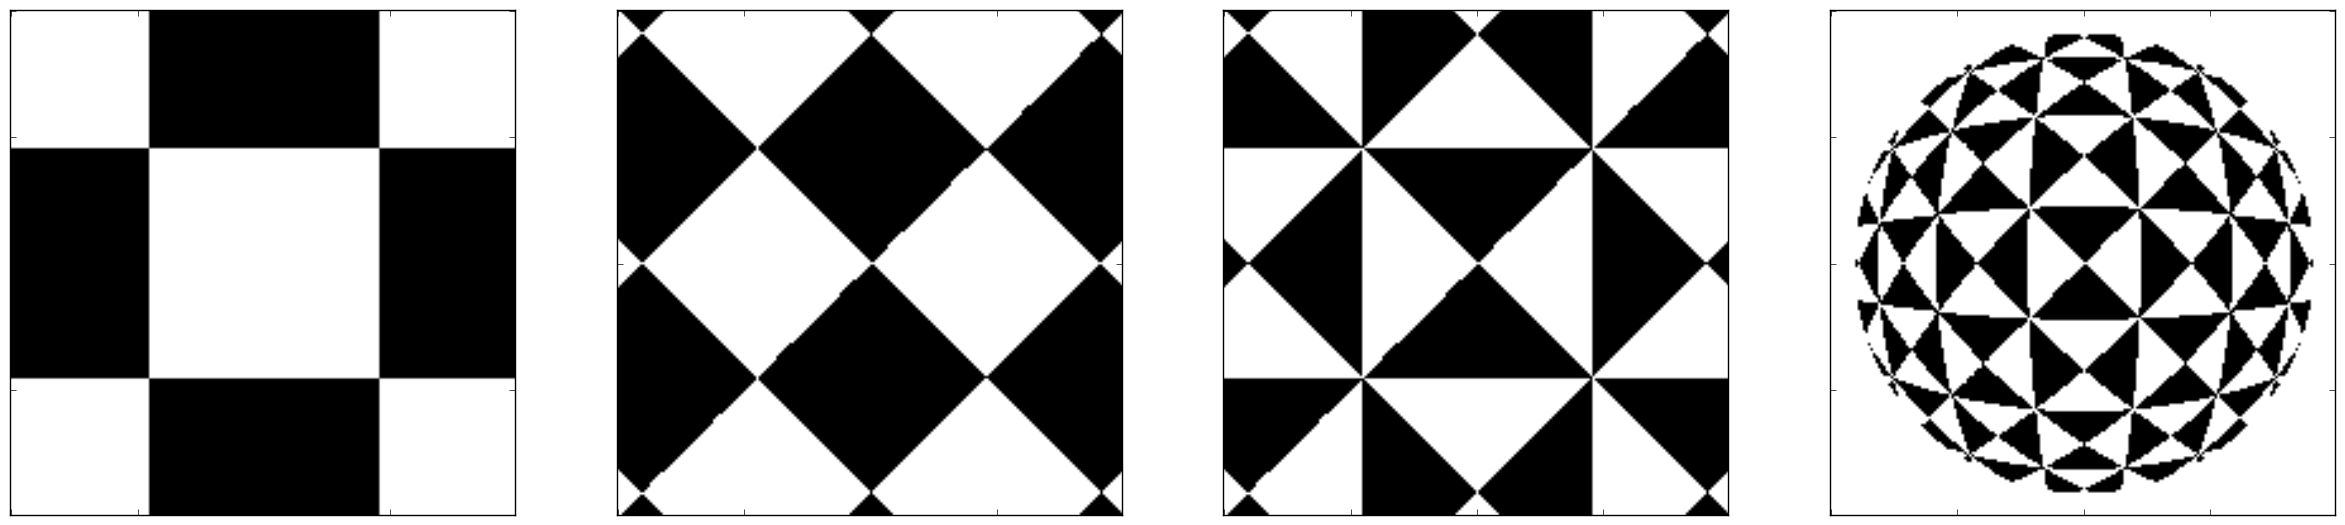

In [4]:
def even(x): return (x/2).round(0)*2==x.round(0)
def checker(x,y): return even(x) ^ even(y)
def rotate45(x,y): return x+y+0.5,x-y+0.5
def distO(x,y): return pow((x*x+y*y),0.5)
def disc(x,y): return distO(x,y)<1
def toPolar(x,y): return distO(x,y), np.arctan2(y,x)
def fromPolar(rho, theta): return rho*np.cos(theta), rho*np.sin(theta)
def xor(im1, im2): return lambda x,y: im1(x,y) ^ im2(x,y)
def both(im1, im2): return lambda x,y: im1(x,y) & im2(x,y)
def dualChecker(): return xor(compose(checker,rotate45),checker)
def ball(f): 
    return compose(
        f, 
        fromPolar,
        lambda r,t:(2*np.tan(r),t), 
        toPolar)
def checkerBall():
    return both(
        disc, #crop to unit circle
        ball(dualChecker())
        )

#show 4 functional images building up to our checkerball: 
#  plain checkerboard,
#  rotated checkerboard,
#  the composition of the two
#  composition mapped onto a ball 
fig, ax = pyplot.subplots(1, 4, figsize=(30,30))
show(checker, scale=1.1, axes=ax[0])
show(compose(checker, rotate45), scale=1.1, axes=ax[1])
show(dualChecker(), scale=1.1, axes=ax[2])
show(checkerBall(), scale=1.1, axes=ax[3])